# Neural Networks
## Andrés Arévalo

- In this notebook we present an introduction to Neural Networks
- We load the  **train\_catvnoncat.h5** traing and testing for the libray **_h5py_** a training and a testing set of images of cats (1) and non cats(0)
- In the first part, we program form scratch the training of a single sigmoid neuron to learn to classify the cats and non cats images , using  backpropagation
- In the second part  we program form scratch the training of a 5 layers neural network (layers 1 to 4 with  relu neurons and layer 5 with a sigmoid neuron), to learn to classify the cats and non cats images, using  backpropagation 

## Neural Networks

Source: [Alpaydın 2010 Introduction to Machine Learning](https://www.cmpe.boun.edu.tr/~ethem/i2ml2e/2e_v1-0/i2ml2e-chap11-v1-0.pdf)

- Large number of neurons: $10^{10}$
- Large connectitivity: $10^5$
- Parallel processing
- Distributed computation/memory
- Robust to noise, failures

## Neurons
<div style="width: 50%; float: left">
    Source: <a href="https://en.wikipedia.org/wiki/File:Blausen_0657_MultipolarNeuron.png"> Wikipedia </a>
    <img src="Neuron.png" />
</div>
<div style="width: 50%; float: left">
    Source: Own elaboration
    <img src="Artificial Neuron.png" />
</div>

## Timeline of Artificial Neural Networks

- Progression (1943-1960)
    + Threshold Logic Unit (TLU): First Mathematical model of neurons. (Pitts & McCulloch 1943)
    + Perceptron: A single neuron for binary classification (Rosenblatt 1958)

Source: [Alpaydın 2010 Introduction to Machine Learning](https://www.cmpe.boun.edu.tr/~ethem/i2ml2e/2e_v1-0/i2ml2e-chap11-v1-0.pdf)
<img src="Perceptron-AND.png" style="height:450px; display: block; margin: auto"/>

Source: [Alpaydın 2010 Introduction to Machine Learning](https://www.cmpe.boun.edu.tr/~ethem/i2ml2e/2e_v1-0/i2ml2e-chap11-v1-0.pdf)
<img src="Perceptron-XOR.png" style="height:450px; display: block; margin: auto"/>

- Degression (1960-1980)
    + Perceptron can not learn the XOR function
    + Evolution of ANN architectures (Multilayer, Recurrent, Convolutional), but all lacked efficient for learning algorithm
    + Backpropagation (Bryson 1963)

- Backpropagation is reinvented
    + Training of ANNs through Back-propagation algorithm (Werbos, 1974)
    + Efficient backpropagation (Rumilhart, 1986)

### Our first neural network

In [1]:
# If dont have the h5py pacakage installed:  
#   (windows) open the anaconda prompt and ---> 'pip install h5py'  
#   (colab) is already installed but if not create  a cel with '!pip install h5py' and run the cell

import h5py
import numpy as np

dataset = h5py.File('train_catvnoncat.h5', 'r')
train_x = np.array(dataset['train_set_x'][:])
train_y = np.array(dataset['train_set_y'][:])[np.newaxis, ...]
dataset = h5py.File('test_catvnoncat.h5', 'r')
test_x = np.array(dataset['test_set_x'][:])
test_y = np.array(dataset['test_set_y'][:])[np.newaxis, ...]
classes = np.array(dataset['list_classes'][:])

print('Train:', train_x.shape, train_y.shape)
print('Test:', test_x.shape, test_y.shape)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Train: (209, 64, 64, 3) (1, 209)
Test: (50, 64, 64, 3) (1, 50)


y = 0 , it's a non-cat


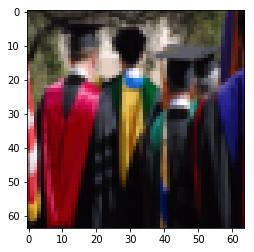

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

m = train_x.shape[0]         # M samples
index = np.random.randint(m) # Choose an image 
plt.imshow(train_x[index])
print('y =', train_y[0, index], ", it's a", classes[train_y[0, index]].decode('utf-8'))

<div style="width: 65%; float: left">
    <img src="ANN.png" style="height: 400px;display: block;margin: auto;" />
</div>
<div style="width: 35%; float: left">
    Raw input $= (m \times 64 \times 64 \times 3) $
    <br/>
    x $ = (12288 \times m) $
    <br/>
    y $ = (1 \times m) $
    <br/>
    Parameters:
    <br/>
    w = $ (1 \times 12288) $
    <br/>
    b is a scalar
</div>

(209, 64, 64, 3) (50, 64, 64, 3)
(12288, 209) (12288, 50)


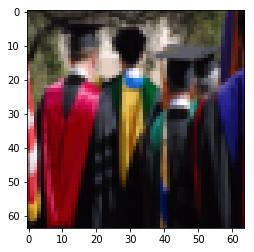

In [3]:
print(train_x.shape, test_x.shape)
# Trasform the image from (m, 64, 64, 3) to (12288, m)
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T / 255.
test_x_flatten  = test_x.reshape(test_x.shape[0], -1).T / 255.

print(train_x_flatten.shape, test_x_flatten.shape)
plt.imshow(train_x_flatten[:, index].reshape(64, 64, 3))

In [4]:
def initialize(dim):
    # Initialize all the parameters with zeros
    w = np.zeros((1, dim))
    b = 0
    return w, b

w, b = initialize(train_x_flatten.shape[0])
print("W:", w.shape)
w, b

W: (1, 12288)


(array([[0., 0., 0., ..., 0., 0., 0.]]), 0)

### Forward propagation
$$ z^{(i)} = W x^{(i)} + b$$

$$ \hat{y}^{(i)} = a^{(i)} = \sigma(z^{(i)}) $$

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

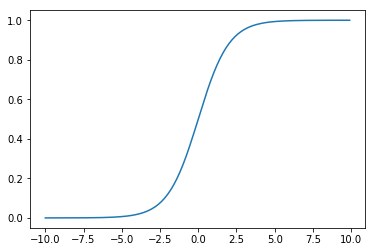

In [6]:
def sigmoid(z):
    # Compute the sigmoid of z
    return 1 / (1 + np.exp(-z))

x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x))

In [7]:
def forward(x, w, b):
    # Compute the forward propagation
    return sigmoid(np.dot(w, x) + b)

A = forward(train_x_flatten, w, b)
A.shape

(1, 209)

In [8]:
def predict(X, w, b):
    A = forward(X, w, b)
    # Decide if it is a cat or non-cat
    predictions = np.asarray(A >= 0.5, int)
    return predictions

def evaluate(prediction, Y):
    # Assess accuracy of prediction model 
    return 1 - np.mean(np.abs(prediction - Y))

prediction = predict(train_x_flatten, w, b)
prediction[0,:10], prediction.shape, evaluate(prediction, train_y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), (1, 209), 0.3444976076555024)

### How to train?

Learning as an optimization problem
<img src="Loss-Optimization.png" style="display: block; margin: auto"/>

### Cost: Cross-entropy error function (logistic regression)

The average of all cross-entropies in the sample

$$ J = - \frac{1}{m} \sum^{m}_{i=1} y^{(i)} \log{(a^{(i)})} + (1 - y^{(i)}) \log{(1- a^{(i)})} $$

In [9]:
def calculate_cost(Y, A):
    m = Y.shape[-1]
    # Calcule the total cost J
    return -np.sum(Y * np.log(A) + (1-Y) * np.log(1-A)) / m

calculate_cost(train_y, A)

0.6931471805599453

### Backward propagation:  Gradient descent

$$ w = w - \alpha \frac{\partial J}{\partial w} \qquad b = b - \alpha \frac{\partial J}{\partial b} $$

$$ \frac{\partial J}{\partial a} = -\frac{y}{a} + \frac{1-y}{1-a} = \frac{a - y}{a \cdot (1 - a)} \qquad \frac{\partial a}{\partial z} =  a \cdot (1 - a) \qquad \frac{\partial z}{\partial w} = x \qquad \frac{\partial z}{\partial b} = 1$$

$$ \frac{\partial J}{\partial w} = \frac{\partial J}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial w} = x \cdot (a - y) \qquad \frac{\partial J}{\partial b} = \frac{\partial J}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial b} = a - y$$

In [10]:
def backward(X, Y, A):
    m = X.shape[1]
    
    # Calculate the gradients
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    
    return dw.T, db

dw, db = backward(train_x_flatten, train_y, A)
dw.shape, db

((1, 12288), 0.15550239234449761)

In [13]:
# If dont have the tqdm pacakage installed:  
#   (windows) open the anaconda prompt and ---> 'pip install tqdm'  
#   (colab) create  a cel with '!pip install tqdm' and run the cell
pip install tqdm
from tqdm import trange

def optimize(X, Y, w, b, num_iterations=1500, learning_rate=0.01):
    costs = []
    for i in trange(num_iterations):
        A = forward(X, w, b)                     # Forward propagation
        costs.append(calculate_cost(Y, A))       # Calculate cost
        dw, db = backward(X, Y, A)               # Backward propagation

        # Update the parameters
        w -= learning_rate * dw
        b -= learning_rate * db
    
    return w, b, costs

w, b = initialize(train_x_flatten.shape[0])
w, b, costs = optimize(train_x_flatten, train_y, w, b)

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
  0%|                                                                                         | 0/1500 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:03<00:00, 396.65it/s]


Train: 0.9952153110047847
Test: 0.6799999999999999


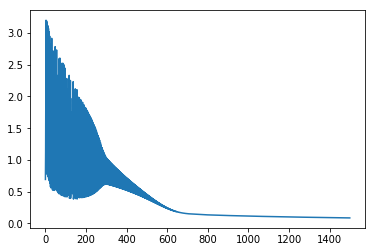

In [14]:
plt.plot(costs)
print('Train:', evaluate(predict(train_x_flatten, w, b), train_y))
print('Test:',  evaluate(predict(test_x_flatten,  w, b), test_y))

Source: [Alpaydın 2010 Introduction to Machine Learning](https://www.cmpe.boun.edu.tr/~ethem/i2ml2e/2e_v1-0/i2ml2e-chap11-v1-0.pdf)
<img src="MLP-XOR.png" style="height:500px; display: block; margin: auto"/>

#### Two-Layer Neural Network
<div style="width: 60%; float: left">
    <img src="ANN2.png" />
</div>
<div style="width: 40%; float: left">
    x $ = (12288 \times m) $
    <br/><br/>
    $ a^{[1]} = (n^{[1]} \times m) $
    <br/>
    $ w^{[1]} = (n^{[1]} \times 12288) $
    <br/>
    $ b^{[1]} = (n^{[1]} \times 1) $
    <br/>
    $ a^{[2]} = (1 \times m) $
    <br/>
    $ w^{[2]} = (1 \times n^{[1]}) $
    <br/>
    $ b^{[2]} = (1 \times 1) $
    <br/><br/>
    $ y = (1 \times m) $
</div>


#### L-Layer Neural Network
<div style="width: 60%; float: left">
    <img src="DNN.png" />
</div>
<div style="width: 35%; float: left">
    x $ = (12288 \times m) $
    <br/><br/>
    $ a^{[1]} = (n^{[1]} \times m) $
    <br/>
    $ w^{[1]} = (n^{[1]} \times 12288) $
    <br/>
    $ b^{[1]} = (n^{[1]} \times 1) $
    <br/>
    $ a^{[l]} = (n^{[l]} \times m) $
    <br/>
    $ w^{[l]} = (n^{[l]} \times n^{[l-1]}) $
    <br/>
    $ b^{[l]} = (n^{[l]} \times 1) $
    <br/><br/>
    $ y = (1 \times m) $
</div>

#### RELU: $ f(x) = \max(0, x) $

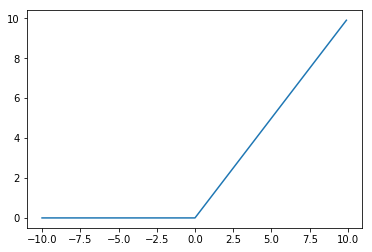

In [15]:
def relu(z):
    # Compute the relu of z
    return np.maximum(0, z) 

x = np.arange(-10, 10, 0.1)
plt.plot(x, relu(x))

In [16]:
def initialize(dims):
    np.random.seed(1)
    parameters = {}
    L = len(dims)
    
    # Initialize all the Weights and Biases
    for l in range(1, L):
        #parameters['w' + str(l)] = np.zeros((dims[l], dims[l-1]))
        parameters['w' + str(l)] = np.random.randn(dims[l], dims[l-1]) / \
            np.sqrt(dims[l-1])
        parameters['b' + str(l)] = np.zeros((dims[l], 1))
    
    return parameters

parameters = initialize([12288, 20, 7, 5, 1])
print("Parameters:", [k + ": " + str(p.shape) for k, p in parameters.items()])

Parameters: ['w1: (20, 12288)', 'b1: (20, 1)', 'w2: (7, 20)', 'b2: (7, 1)', 'w3: (5, 7)', 'b3: (5, 1)', 'w4: (1, 5)', 'b4: (1, 1)']


### Forward propagation

$ z^{[l]} = W^{[l]} a^{[l-1]} + b \qquad a^{[0]} = x \qquad a^{[l]} = \sigma(z^{[l]}) $


In [17]:
def forward_layer(a, w, b, activation):
    # Compute z
    z = np.dot(w, a) + b
    cache = (a, w, b, z)
    # Compute a
    a = activation(z)
    return a, cache

a, cache = forward_layer(train_x_flatten, parameters['w1'], parameters['b1'], relu)
a.shape

(20, 209)

In [19]:
def forward(x, parameters):
    L = len(parameters) // 2
    
    caches = []
    # Compute a^[0]
    a = x
    for l in range(1, L):
        # Compute a^[l] and add the cache
        a, cache = forward_layer(a, parameters['w' + str(l)],
                                 parameters['b' + str(l)], relu)
        caches.append(cache)
    
    # Compute a^[L] and add the cache
    a, cache = forward_layer(a, parameters['w' + str(L)],
                                 parameters['b' + str(L)], sigmoid)
    caches.append(cache)
    
    return a, caches

a, caches = forward(train_x_flatten, parameters)
a.shape

(1, 209)

In [20]:
# Fix this function:
def predict(x, parameters):
    a, _ = forward(x, parameters)
    predictions = np.asarray(a >= 0.5, int)
    return predictions

evaluate(predict(train_x_flatten, parameters), train_y)

0.3444976076555024

### Cost: Cross-entropy error function (logistic regression)

In [21]:
calculate_cost(train_y, a)

0.7717493284237686

### Backward propagation

$$ a^{[l]} = g^{[l]}\left(z^{[l]}\right)$$

$$ \frac{\partial J}{\partial z^{[l]}} = \frac{\partial J}{\partial a^{[l]}} \frac{\partial a^{[l]}}{\partial z^{[l]}} $$

In [22]:
# Gradient of the cost with respect to Z
def relu_backward(da, z):
    dz = np.array(da, copy=True)
    dz[z <= 0] = 0
    return dz

def sigmoid_backward(da, z):
    s = sigmoid(z)
    dz = da * s * (1 - s)
    return dz

$$ z^{[l]} = W^{[l]} a^{[l-1]} + b^{[l]} $$
$$ \frac{\partial J}{\partial w^{[l]}} = \frac{\partial J}{\partial z^{[l]}} \frac{\partial z^{[l]}}{\partial w^{[l]}} = \frac{\partial J}{\partial z^{[l]}} a^{[l-1]} \qquad
 \frac{\partial J}{\partial b^{[l]}} = \frac{\partial J}{\partial z^{[l]}} \frac{\partial z^{[l]}}{\partial b^{[l]}} = \frac{\partial J}{\partial z^{[l]}}$$
$$ \frac{\partial J}{\partial a^{[l-1]}} = w^{[l]} \frac{\partial J}{\partial z^{[l]}} $$

In [23]:
def backward_layer(da, cache, activation):
    a_prev, w, b, z = cache
    m = a_prev.shape[1]
    # Gradient of the cost with respect to Z
    dz = relu_backward(da, z) if activation == relu else sigmoid_backward(da, z)
    
    # Calculate the gradients
    dw = np.dot(dz, a_prev.T) / m
    db = np.sum(dz, axis=1, keepdims=True) / m
    da_prev = np.dot(w.T, dz)
    return da_prev, dw, db

$$ J = -y \log{(a^{[L]})} + (1 - y^{[L]}) \log{(1 - a^{[L]})} $$
$$ \frac{\partial J}{\partial{a^{[L]}}} = -\frac{y}{a^{[L]}} + \frac{1-y}{1-a^{[L]}} $$

In [24]:
def backward(a, y, caches):
    L = len(caches) # the number of layers
    m = a.shape[1]
    # Initialize the backpropagation
    da = -np.divide(y, a) + np.divide(1-y, 1-a)
    
    current_cache = caches[-1]
    grads = {} # Grads layer L
    grads['da' + str(L-1)], grads['dw' + str(L)], grads['db' + str(L)] = \
        backward_layer(da, current_cache, sigmoid)
    for l in reversed(range(L-1)):
        current_cache = caches[l] # Grads layer l
        grads['da' + str(l)], grads['dw' + str(l+1)], grads['db' + str(l+1)] = \
            backward_layer(grads['da' + str(l+1)], current_cache, relu)
    return grads

In [73]:
from tqdm import trange

def optimize(x, y, parameters, num_iterations=1500, learning_rate=0.0075):
    # number of layers in the neural network
    L = len(parameters) // 2
    
    costs = []
    for i in trange(num_iterations):
        a, caches = forward(x, parameters) # Perform forward propagation
        costs.append(calculate_cost(y, a)) # Calculate cost and add to costs
        grads = backward(a, y, caches)     # Perform backward propagation

        # Apply the Update rule
        for l in range(L):
            parameters['w'+str(l+1)] -= learning_rate * grads['dw' + str(l+1)]
            parameters['b'+str(l+1)] -= learning_rate * grads['db' + str(l+1)]
    
    return parameters, costs

parameters = initialize([12288, 20, 7, 5, 1])
parameters, costs = optimize(train_x_flatten, train_y, parameters)

100%|██████████████████████████████████████| 1500/1500 [00:52<00:00, 28.64it/s]


Train: 0.3444976076555024
Test: 0.6599999999999999


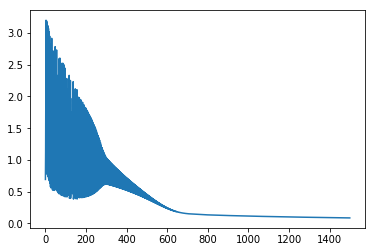

In [25]:
plt.plot(costs)
print('Train:', evaluate(predict(train_x_flatten, parameters), train_y))
print('Test:',  evaluate(predict(test_x_flatten,  parameters), test_y))

In [29]:
# If dont have the cv2 pacakage installed:  
#   (windows) https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_setup_in_windows/py_setup_in_windows.html#exercises
#   (colab) create  a cel with !pip install cv2 and run the cel 

#from scipy.misc import imresize
!pip install cv2
from cv2 import resize, INTER_AREA

# https://en.wikipedia.org/wiki/Cat#/media/File:Kittyply_edit1.jpg
# https://www.expertoanimal.com/10-curiosidades-del-golden-retriever-21261.html
for i in range(1,26):
    if i == 1: g= "cats facecenter" 
    if i == 6: g= "cats face side"   
    if i == 11: g= "pets face center" 
    if i == 16: g= "pets face side"
    if i == 21: g= "other things"    
    filename = "im"+ str(i) +".jpg"
    
    image = np.array(plt.imread(filename))
    image = resize(image, dsize=(64,64), interpolation = INTER_AREA)
   
    plt.figure()
   
    plt.imshow(image)
    
    image = image.reshape(1, -1).T / 255.
    plt.title("imagen " + str(i) + ":" + str(classes[int(predict(image, parameters))]) + " - Group: "+ g)

    
    
    

  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


ModuleNotFoundError: No module named 'cv2'

In [95]:
parameters = initialize([12288, 6000, 3000 , 1500, 750, 325, 160, 80, 40, 20, 10, 5, 1 ])
parameters, costs = optimize(train_x_flatten, train_y, parameters)

100%|████████████████████████████████████| 1500/1500 [3:12:49<00:00,  7.42s/it]


('Train:', 0.9138755980861244)
('Test:', 0.76)


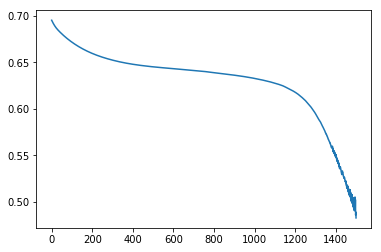

In [96]:
plt.plot(costs)
print('Train:', evaluate(predict(train_x_flatten, parameters), train_y))
print('Test:',  evaluate(predict(test_x_flatten,  parameters), test_y))

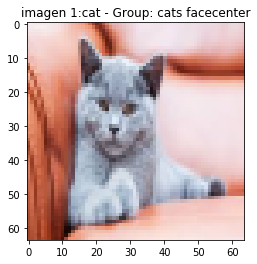

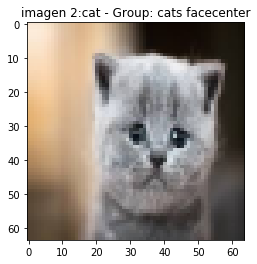

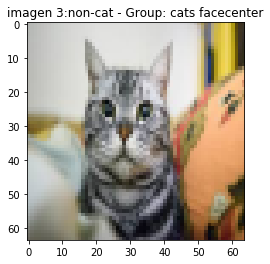

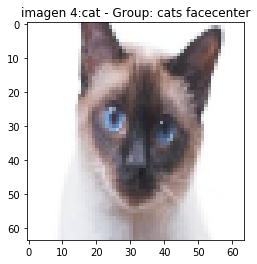

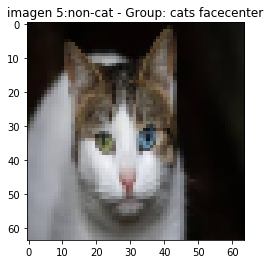

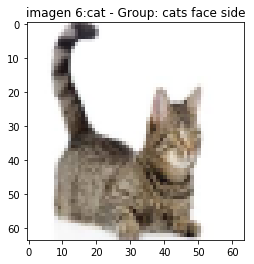

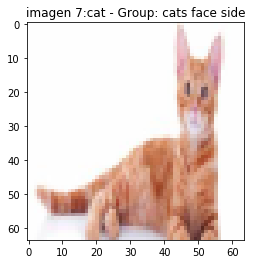

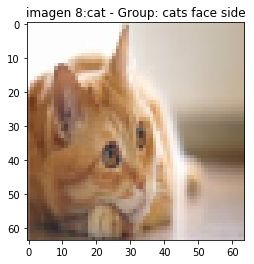

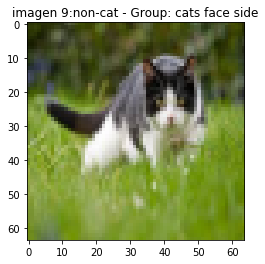

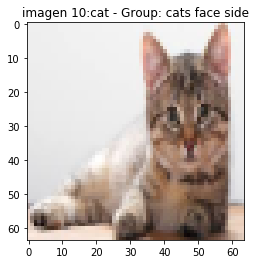

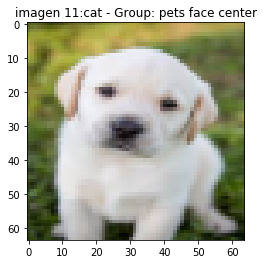

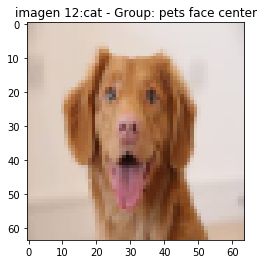

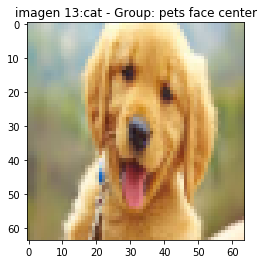

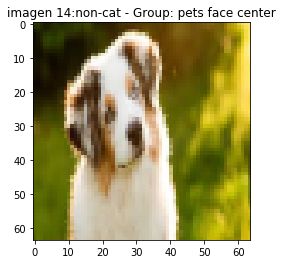

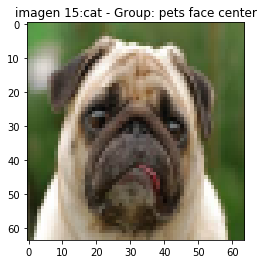

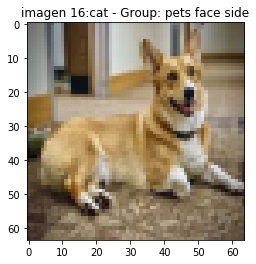

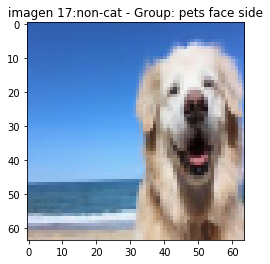

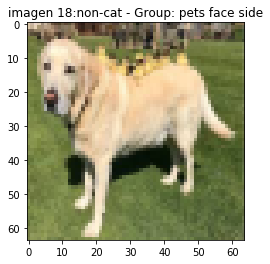

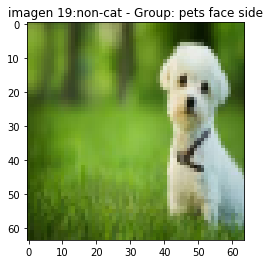

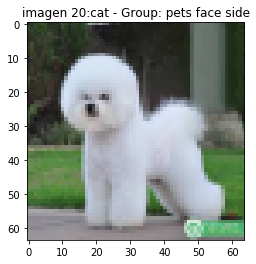

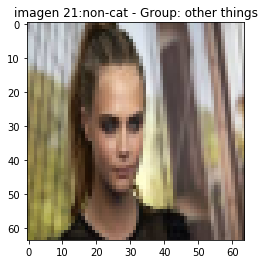

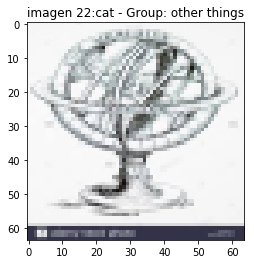

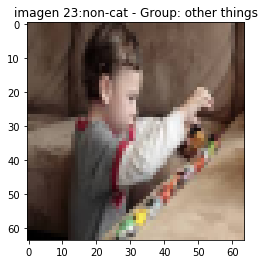

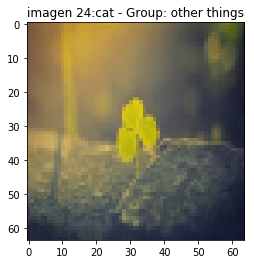

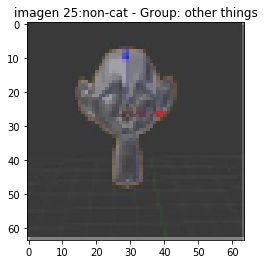

In [97]:
# If dont have the cv2 pacakage installed:  
#   (windows) https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_setup/py_setup_in_windows/py_setup_in_windows.html#exercises
#   (colab) create  a cel with !pip install cv2 and run the cel 

#from scipy.misc import imresize

from cv2 import resize, INTER_AREA

# https://en.wikipedia.org/wiki/Cat#/media/File:Kittyply_edit1.jpg
# https://www.expertoanimal.com/10-curiosidades-del-golden-retriever-21261.html
for i in range(1,26):
    if i == 1: g= "cats facecenter" 
    if i == 6: g= "cats face side"   
    if i == 11: g= "pets face center" 
    if i == 16: g= "pets face side"
    if i == 21: g= "other things"    
    filename = "im"+ str(i) +".jpg"
    
    image = np.array(plt.imread(filename))
    image = resize(image, dsize=(64,64), interpolation = INTER_AREA)
   
    plt.figure()
   
    plt.imshow(image)
    
    image = image.reshape(1, -1).T / 255.
    plt.title("imagen " + str(i) + ":" + str(classes[int(predict(image, parameters))]) + " - Group: "+ g)


#### Gradient descent optimization algorithms

Source: [Alec Radford](http://2.bp.blogspot.com/-q6l20Vs4P_w/VPmIC7sEhnI/AAAAAAAACC4/g3UOUX2r_yA/s1600/s25RsOr%2B-%2BImgur.gif)

<img src="Optimization Algorithms.gif" style="display: block; margin: auto; height:400px"/>

#### Convolutional networks

Source: [Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network#/media/File:Typical_cnn.png)

<img src="CNN.png" style="display: block; margin: auto;"/>

#### Convolutional networks

Source: [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

<img src="RNN.png" style="display: block; margin: auto;"/>

#### Deep Learning

Source: [Ian Goodfellow and Yoshua Bengio and Aaron Courville](http://www.deeplearningbook.org/)

<img src="DL.png" style="display: block; margin: auto; height:450px"/>

#### Classical Machine Learning vs. Deep Learning

Source: [George Seif](https://towardsdatascience.com/deep-learning-vs-classical-machine-learning-9a42c6d48aa)

<img src="Amount-Data.png" style="display: block; margin: auto; height:450px"/>

## References

- [Coursera: Deep Learning Specialization](https://en.coursera.org/specializations/deep-learning)
- [Lecture Notes for E Alpaydın 2010 Introduction to Machine Learning 2e © The MIT Press (V1.0)](https://www.cmpe.boun.edu.tr/~ethem/i2ml2e/2e_v1-0/)